# 第11章 Scala的继承关系
既然你已经在前一章了解了关于类继承的细节，现在是时候退一步完整地看一下Scala的类继承关系了。在Scala中，每个类都继承自同一个名为A n y的超类。由于每个类都是Any的子类，在Any中定义的方法是“全类型的”（universal）：它们可以在任何对象上被调用。Scala还在继承关系的底部定义了一些有趣的类，Null和Nothing，它们本质上是作为通用的子类存在的。例如，就像Any是每一个其他类的超类那样，Nothing是每一个其他类的子类。在本章中，我们将带你领略Scala的整个类继承关系。
## 11.1 Scala的类继承关系
图11.1展示了Scala类继承关系的轮廓。在继承关系的顶部是Any类，定义了如下方法：
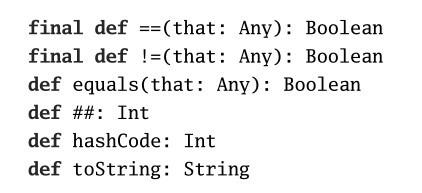

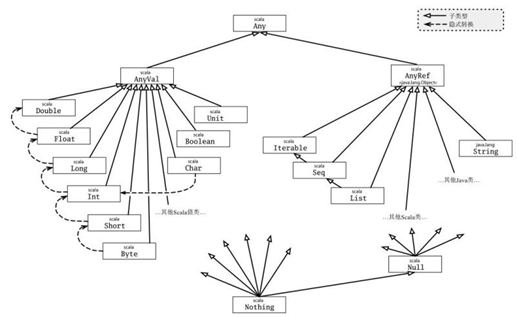
由于每个类都继承自A n y,Scala程序中的每个对象都可以用==、!=或equals来进行比较，用##或hashCode做哈希，以及用toString做格式化。相等和不等方法（==和！=）在Any类中声明为finla，所以它们不能被子类重写。

==方法从本质上讲等同于equals，而！=一定是equals的反义。[1]这样一来，子类可以通过重写equals方法来定制==或！=的含义。我们将在本章后面给出示例。
根类Any有两个子类：AnyVal和AnyRef。AnyVal是Scala中所有值类（value class）的父类。虽然你可以定义自己的值类（参见11.4节）,Scala提供了九个内建的值类：Byte、Short、Char、Int、Long、Float、Double、Boolean和Unit。前八个对应Java的基本类型，它们的值在运行时是用Java的基本类型的值来表示的。这些类的实例在Scala中统统写作字面量。例如，42是Int的实例，＇x＇是Char的实例，而false是Boolean的实例。不能用new来创建这些类的实例。这一点是通过将值类定义为抽象的同时是final的这个“小技巧”来完成的。

所以如果你尝试编写这样的代码：


In [0]:
new Int

cmd0.sc:1: class Int is abstract; cannot be instantiated
val res0 = new Int
           ^Compilation Failed

: 

另外的那个值类Unit粗略地对应到Java的void类型；它用来作为那些不返回有趣的结果的方法的结果类型。Unit有且只有一个实例值，写作（），正如我们在7.2节提到的那样。
我们在第5章曾经解释过，值类以方法的形式支持通常的算术和布尔操作符。例如，Int拥有名为+和*的方法，而Boolean拥有名为||和&&的方法。值类同样继承了Any类的所有方法。可以在解释器中测试这一点：


In [2]:
42.toString
42.hashCode
42 equals 42

res1_0: String = "42"
res1_1: Int = 42
res1_2: Boolean = true

注意，值类空间是扁平的，所有的值类都是scala.AnyVal的子类，但它们相互之间并没有子类关系。不同的值类类型之间存在隐式的转换。例如，在需要时，scala.Int类的一个实例可以（通过隐式转换）被自动放宽成scala.Long的实例。

正如我们在5.10节提到的，隐式转换还被用于给值类型添加更多功能。例如，Int类型支持所有下列操作：


In [4]:
42 max 43
42 min 43
1 until 5
1 to 5
3.abs
(-3).abs

res3_0: Int = 43
res3_1: Int = 42
res3_2: Range = Range(1, 2, 3, 4)
res3_3: Range.Inclusive = Range.Inclusive(1, 2, 3, 4, 5)
res3_4: Int = 3
res3_5: Int = 3

工作原理是这样的：方法min、max、until、to和abs都定义在scala. runtime.RichInt类中，并且存在从Int类到RichInt类的隐式转换。只要对Int调用的方法没有在Int类中定义，而RichInt类中定义了这样的方法，隐式转换就会被自动应用。其他值类也有类似的“助推类”和隐式转换。我们将在第21章详细探讨隐式转换。

根类Any的另一个子类是AnyRef类。这是Scala所有引用类的基类。前面我们提到过，在Java平台上AnyRef事实上只是java.lang.Object的一个别名。因此Java编写的类和Scala编写的类都继承自AnyRef。[2]因此，我们可以这样来看待java.lang.Object：它是AnyRef在Java平台的实现。虽然可以在面向Java平台的Scala程序中任意换用Object和AnyRef，推荐的风格是尽量都使用AnyRef。

## 11.2 基本类型的实现机制
所有这些是怎么实现的呢？事实上，Scala存放整数的方式跟Java一样，都是32位的词（word）。这对于JVM上的效率以及跟Java类库的互操作都很重要。标准操作比如加法和乘法被实现为基本操作。不过，Scala在任何需要将整数当作（Java）对象时，都会启用“备选”的java.lang.Integer类。例如，当我们对整数调用toString或当我们将整数赋值给一个类型为Any的变量时，都会发生这种情况。类型为Int的整数在必要时都会透明地被转换成类型为java.lang.Integer的“装箱整数”。

所有这些听上去都很像Java 5的自动装箱（auto-boxing）机制，也的确非常相似。不过有一个重要区别：Scala中的装箱跟Java相比要透明得多。参考下面的Java代码：
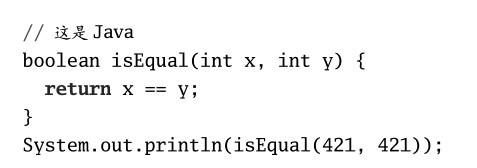
你当然会得到true。现在，将isEqual的参数类型改为java.lang.Integer（或者Object也可以，结果是一样的）：
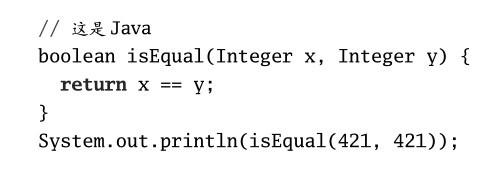
你会发现你得到了false！发生了什么？这里的数字421被装箱了两次，因此x和y这两个参数实际上是两个不同的对象。由于==对于引用类型而言意味着引用相等性。而Integer是个引用类型，结果就是false。这一点也显示出Java并不是一个纯的面向对象语言。基本类型和引用类型之间有一个清晰可被观察到的区别。

现在，我们用Scala来做相同的实验：

In [8]:
def isEqual(x: Int, y: Int): Boolean = x == y
isEqual(421, 421)
def isEqual(x: Any, y: Any): Boolean = x == y
isEqual(421, 421)

defined function isEqual
res7_1: Boolean = true
defined function isEqual
res7_3: Boolean = true

Scala的相等性操作==被设计为对于类型的实际呈现是透明的。对于值类型而言，它表示的是自然（数值或布尔值）相等性。而对出Java装箱数值类型之外的引用类型，==被处理成从Object继承的equals方法的别名。这个方法原本定义用于引用相等性，但很多子类都重写了这个方法来实现它们对于相等性更自然的理解和表示。这也意味着在Scala中不会陷入Java那个跟字符串对比相关的陷阱。Scala的字符串对比是它应该有的样子：

In [10]:
val x = "abcd".substring(2)
val y = "abcd".substring(2)
x == y

x: String = "cd"
y: String = "cd"
res9_2: Boolean = true

在Java中，对x和y的对比结果会返回false。程序员在这里应该用equals，但是很容易忘记。

不过，在有些场景下你需要引用相等性而不是用户定义的相等性。例如，有些场景对于效率的要求超高，你可能会对某些类使用hash cons并用引用相等性来比对其实例。[3]对这些情况，AnyRef类定义了一个额外的eq方法，该方法不能被重写，实现为引用相等性（即它的行为跟Java中==对于引用类型的行为是一致的）。还有一个eq的反义方法ne。例如：

In [1]:
val x = "abcd".substring(2)
val y = "abcd".substring(2)
x == y
x eq y
x ne y

x: String = "cd"
y: String = "cd"
res0_2: Boolean = true
res0_3: Boolean = false
res0_4: Boolean = true

我们将在第30章进一步探讨Scala的对象相等性。

## 11.3 底类型（bottom types）
在图11.1中的类继承关系的底部，你会看到两个类：scala.Null和scala.Nothing。它们是Scala面向对象的类型系统用于统一处理某些“极端情况”（corner case）的特殊类型。

Null类是null引用的类型，它是每个引用类（也就是每个继承自AnyRef的类）的子类。Null并不兼容于值类型，比如你并不能将null赋值给一个整数变量：


In [12]:
val i: Int = null

cmd12.sc:1: an expression of type Null is ineligible for implicit conversion
val i: Int = null
             ^Compilation Failed

: 

Nothing位于Scala类继承关系的底部，它是每个其他类型的子类型。不过，并不存在这个类型的任何值。为什么需要这样一个没有值的类型呢？我们在7.4节曾讨论过，Nothing的用途之一是给出非正常终止的信号。

举例来说，Scala标准类库的Predef对象有一个error方法，其定义如下：


In [14]:
def error(message: String): Nothing = 
    throw new RuntimeException(message)

defined function error

error的返回类型是Nothing，这告诉使用方该方法并不会正常返回（它会抛出异常）。由于Nothing是每个其他类型的子类型，可以以非常灵活的方式来使用error这样的方法。例如：

In [17]:
def divide(x: Int, y: Int): Int = 
    if(y!=0) x / y
    else error("can't divide by zero")


divide(1,0)

: 

这里x / y条件判断的“then”分支的类型为Int，而else分支（即调用error的部分）类型为Nothing。由于Nothing是Int的子类型，整个条件判断表达式的类型就是Int，正如方法声明要求的那样。

## 11.4 定义自己的值类型
我们在11.1节提到过，可以定义自己的值类来对内建的值类进行扩充。跟内建的值类一样，你的值类的实例通常也会编译成那种不使用包装类的Java字节码。在需要包装类的上下文里，比如泛型代码，值将被自动装箱和拆箱。

只有特定的几个类可以成为值类。要使得某个类成为值类，它必须有且仅有一个参数，并且在内部除了def之外不能有任何其他东西。不仅如此，也不能有其他类扩展自值类，且值类不能重新定义equals或hashCode。

要定义值类，你需要将它处理成AnyVal的子类，并在它唯一的参数前加上val。以下是值类的一个例子：

In [0]:
class Dollars(val amount: Int) extends AnyVal {
    override def toString() = "$" + amount
}

//这个例子在jupyter这边不行，在scala解释器上是可以正常运行的

cmd0.sc:1: value class may not be a member of another class
class Dollars(val amount: Int) extends AnyVal {
      ^Compilation Failed

: 

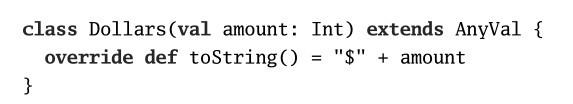
正如我们在10.6节描述的那样，参数前的val让amount参数可以作为字段被外界访问。例如，如下代码将创建这个值类的一个实例，然后从中获取其金额（amount）：
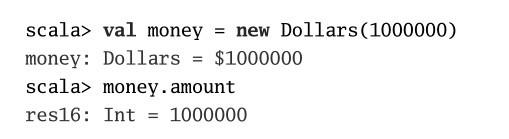
在本例中，m o n e y指向该值类的一个实例。它在Scala源码中的类型为Dollar，但在编译后的Java字节码中将直接使用Int。
这个例子定义了toString方法，编译器将识别出什么时候使用这个方法。这就是为什么打印money将给出$1000000，带上了美元符号，而打印money. amount仅会给出1000000。你甚至可以定义多个同样以Int值支撑的值类型。例如：
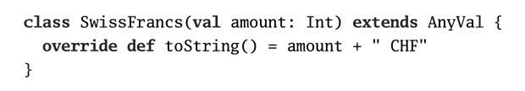
尽管Dollars和SwissFrancs最终都是以整数呈现的，在相同作用域内同时使用它们并没有什么问题：
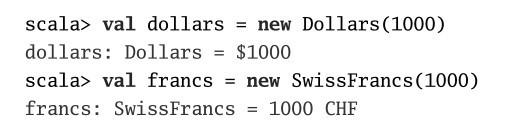
**避免类型单一化**  
要想尽可能发挥Scala类继承关系的好处，请试着对每个领域概念定义一个新的类，哪怕复用相同的类作不同的用途是可行的。即便这样的一个类是所谓的细微类型（tiny type），既没有方法也没有字段，定义这样的一个额外的类有助于编译器在更多的地方帮到你。
例如，假定你正在编写代码生成HTML。在HTML中，风格名是用字符串表示的。锚定标识符也是如此。HTML自身也是个字符串，所以只要你想，就可以用字符串定义的助手方法来表示所有这些内容，就像这样：
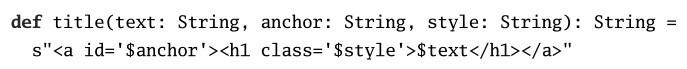
这个类型签名中出现了四个字符串！这类字符串类型（stringly typed）[4]的代码从技术上讲是强类型的，但由于我们能看到的一切都是字符串类型的，编译器并不能帮你检测到用错的参数情况。例如，它并不会阻止你写出这样的滑稽代码：
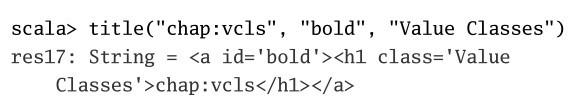
这段HTML代码完全坏掉了。本意是用来显示的文本“Value Classes”被用成了风格类，而显示出来的文本是“chap.vcls”，这本来应该是锚定点的。最后，实际的锚定标识为“bold”，这其实本应是风格类的。尽管这些错误都很滑稽，编译器一声都不会响。
如果你对每个领域概念都定义一个细微类型，编译器就能对你更有帮助。比如，可以分别对风格、锚定标识、显示文本和HTML等都定义一个小类。由于这些类只有一个参数，没有其他成员，它们可以被定义成值类：
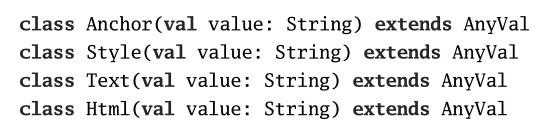
有了这些类以后，我们就可以编写出一个类型签名更丰满的title方法了：
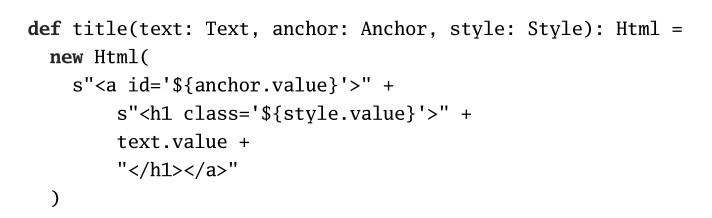
这时如果你再用错误的顺序调用这个版本的方法，编译器就可以探测到这个错误（并提示你）。例如：
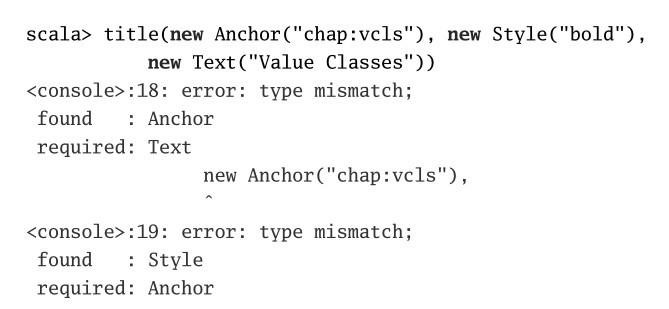
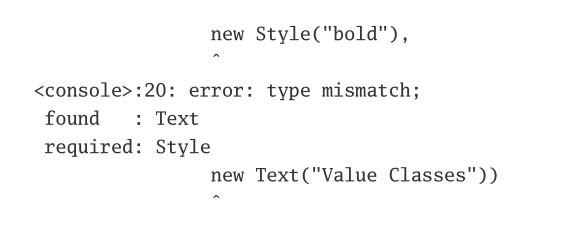

## 11.5 结语
本章向你展示了Scala类继承关系中的位于顶部和底部的类。有了这些Scala类继承关系的基础，你已经准备好理解混入组合（mixin composition）的概念。在一下章，你将了解到什么是特质。

________________________________________
[1].唯一一个==不直接调用equals的场景是Java的数值类，比如Integer或Long。在Java中， new Integer（1）并不等于（equal） new Long（1），尽管对于基本类型的值而言，1 == 1L。由于Scala跟Java相比是个更规则的语言，我们在实现时有必要将这些类的==做特殊处理，来解决这个差异。同理，##方法提供了Scala版本的哈希算法，跟Java的hashCode一样，除了一点：对包装的数值类型而言，它的行为跟==是一致的。例如，new Integer（1）和new Long（1）通过##能取到相同的哈希值，尽管它们的Java版hashCode是不同的。  
[2].AnyRef这样的别名之所以存在，而不是简单地使用java.lang.Object这个名字，是因为Scala最开始设计为同时支持Java和.NET平台。在.NET平台上，AnyRef是System.Object的别名。  
[3].hash cons的意思是将你创建的实例缓存在一个弱引用的集合中。然后，当你想获取该类的新实例时，首先检查这个缓存，如果缓存已经有一个元素跟你要创建的相等，你就可以复用这个已存在的实例。这样一来，任何两个以equals（）相等的实例从引用相等性的角度也是相等的。  
[4].这里的stringly有双关的意思，对应strongly。——译者住
